In [31]:
from urllib import request, error
#import a module with classes and functions which help opening URL's
from bs4 import BeautifulSoup as bs
#A library that makes webscraping easier


site1 = "https://worldpopulationreview.com/country-rankings/crime-rate-by-country"
#save the site we want to extract from to a variable
response = bs(request.urlopen(site1),"html.parser")
#opens a conection to the site, and stores the html content
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")
#searches the html for the first table with the class specified
rows = TAB.find_all("tr")
#searches the table for al tr tags

with open("Crime.csv", "w") as file:
    #creates a file called Crime.csv and writes to it
    file.write("..,Country,Crime index,Safety index")
    #creating column headers
    for row in rows:
        cells = row.find_all("td")
        #finds data cells in the row
        rowContents = []
        #creates a blank list
        for cell in cells:
            rowContents.append(cell.text.strip())
            #appents the data to the list
        file.write(",".join(rowContents) + "\n")
        #list is written to the files

In [33]:
import pandas as pd
#import the pandas library to work with dataframes
Crimedf = pd.read_csv("Crime.csv")
#our csv file is imported to a dataframe
Crimedf.drop(columns=["..", "Safety index"], axis=1, inplace=True)
#dropping columns we will not be working with
pd.to_numeric(Crimedf["Crime index"], errors="coerce")
#convert data to numeric
Crimedf


,Country,Crime index
0,Venezuela,81.2
1,Papua New Guinea,79.7
2,Afghanistan,78.3
3,Haiti,77.9
4,South Africa,75.4
...,...,...
136,Oman,19.0
137,Taiwan,16.7
138,Qatar,16.0
139,United Arab Emirates,15.6


In [35]:
site2 = "https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country"
#import another table
response = bs(request.urlopen(site2),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Gini.csv", "w") as file:
    file.write("..,Country,Gini Coefficient (%),1,2,3")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

In [36]:
Ginidf = pd.read_csv("Gini.csv")
Ginidf.drop(columns=["..", "1", "2", "3"], axis=1, inplace=True)
Ginidf["Gini Coefficient (%)"]=Ginidf["Gini Coefficient (%)"].str.replace("%", "")
#removing the percentage symbol so we can convert to numeric
Ginidf["Gini Coefficient (%)"]= pd.to_numeric(Ginidf["Gini Coefficient (%)"], errors="coerce")
Ginidf


,Country,Gini Coefficient (%)
0,South Africa,63.0
1,Namibia,59.1
2,Colombia,54.8
3,Eswatini,54.6
4,Botswana,53.3
...,...,...
229,Montserrat,NaN
230,Falkland Islands,NaN
231,Tokelau,NaN
232,Niue,NaN


In [39]:
site3 = "https://worldpopulationreview.com/country-rankings/hdi-by-country"

response = bs(request.urlopen(site3),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("HDI.csv", "w") as file:
    file.write("..,Country,HDI tier,HDI")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

In [41]:
HDIdf = pd.read_csv("HDI.csv")
HDIdf.drop(columns=["..", "HDI tier"], axis=1, inplace=True)
HDIdf

,Country,HDI
0,United States,0.927
1,Russia,0.821
2,Japan,0.920
3,Turkey,0.855
4,Germany,0.950
...,...,...
188,Saint Vincent and the Grenadines,0.772
189,Dominica,0.740
190,Marshall Islands,0.731
191,Palau,0.797


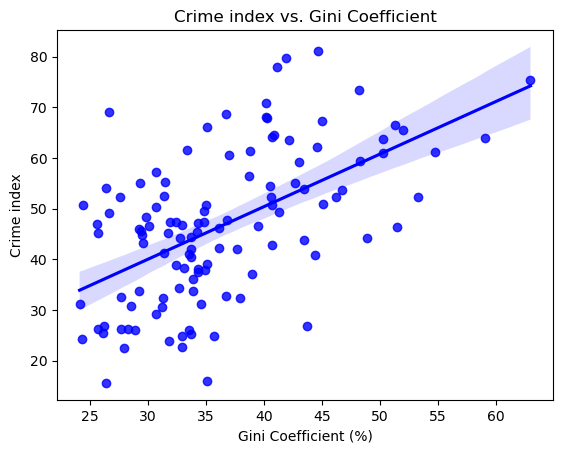

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
#we will use matplotlib for plots
crimevsgini = pd.merge(Crimedf, Ginidf, on="Country",how="inner")
#merging crime and gini dataframe so we can compare them
crimevsgini
sns.regplot(x=crimevsgini["Gini Coefficient (%)"], y=crimevsgini["Crime index"], line_kws={"color": "blue"}, scatter_kws={"color": "blue"})

plt.xlabel("Gini Coefficient (%)")
plt.ylabel("Crime index")
plt.title("Crime index vs. Gini Coefficient")
plt.savefig("CrimevsGini.png")
plt.show()
#fig = scatter1.get_figure()

#saving the figure as a png

In [44]:
#testing for correlation
import scipy.stats

crimevsgini = crimevsgini.dropna()
#dropping null columns
crimeList = list(crimevsgini["Crime index"])
giniList = list(crimevsgini["Gini Coefficient (%)"])
#converting the columns to list form
coeffcient, pvalue = scipy.stats.pearsonr(crimeList, giniList)
#this calculates the pvalue which we can use to determine if correlation is significant
if pvalue < 0.05:
    print("reject null hypothesis, correlation is significant")
else:
    print("do not reject, insufficient evidence")
print(coeffcient, pvalue)

reject null hypothesis, correlation is significant
0.5549908301802727 8.393596060847778e-11


In [47]:
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
x = crimevsgini[["Gini Coefficient (%)"]]
y = crimevsgini["Crime index"]
regr1.fit(x, y)

print(regr1.coef_)

[1.03700202]


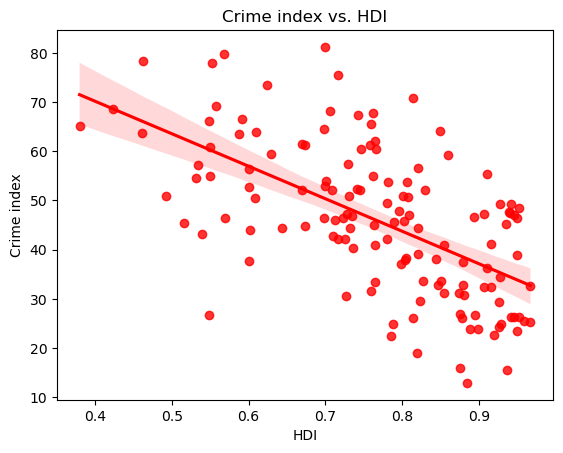

In [48]:
CrimevsHDI = pd.merge(Crimedf, HDIdf, on="Country")
CrimevsHDI
sns.regplot(x=CrimevsHDI ["HDI"], y=CrimevsHDI ["Crime index"], line_kws={"color": "red"}, scatter_kws={"color": "red"})

plt.xlabel("HDI")
plt.ylabel("Crime index")
plt.title("Crime index vs. HDI")
plt.savefig("CrimevsHDI.png")
plt.show()


In [49]:
CrimevsHDI = CrimevsHDI.dropna()

crimeList = list(CrimevsHDI["Crime index"])
HDIList = list(CrimevsHDI["HDI"])

coeffcient, pvalue = scipy.stats.pearsonr(crimeList, HDIList)

if pvalue < 0.05:
    print("reject null hypothesis, correlation is significant")
else:
    print("do not reject, insufficient evidence")
print(coeffcient, pvalue)


reject null hypothesis, correlation is significant
-0.5964152735013517 1.4716154074037866e-14


In [51]:
regr2 = linear_model.LinearRegression()
x = CrimevsHDI[["HDI"]]
y = CrimevsHDI["Crime index"]
regr2.fit(x, y)

print(regr2.coef_)

[-66.09665282]


In [55]:
import shutil
#shutil is a libraty used for file operation
import os
#os will also be used for file operations
request.urlretrieve("https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv", "GiniUK.zip")
#this dataset offered a direct download link to its data, so we will directly download it to a zip file
shutil.unpack_archive("GiniUK.zip")
#using shutil to extract files
os.rename("API_SI.POV.GINI_DS2_en_csv_v2_19376.csv", "GiniUK.csv")
#renaming the file containing our data



FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'API_SI.POV.GINI_DS2_en_csv_v2_19376.csv' -> 'GiniUK.csv'

,Country Name,Year,Gini
81,United Kingdom,1960.0,NaN
347,United Kingdom,1961.0,NaN
613,United Kingdom,1962.0,NaN
879,United Kingdom,1963.0,NaN
1145,United Kingdom,1964.0,NaN
...,...,...,...
16307,United Kingdom,2021.0,32.4
16573,United Kingdom,2022.0,NaN
16839,United Kingdom,2023.0,NaN
17105,United Kingdom,2024.0,NaN


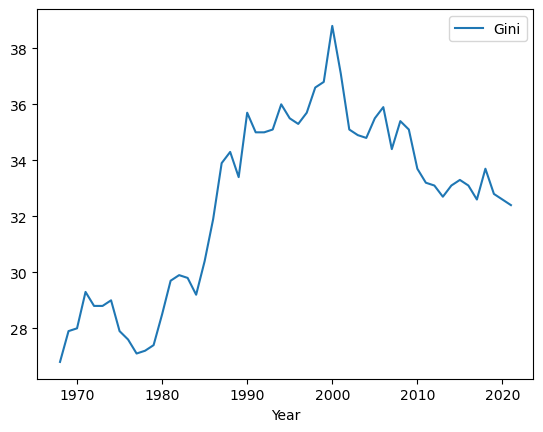

In [101]:
GiniUKdf = pd.read_csv("GiniUK.csv", header=2)
#this dataframe starts from row 3 because there is some unnecesary information
GiniUKdf = GiniUKdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GiniUKdf = pd.melt(GiniUKdf, id_vars=["Country Name"], var_name="Year", value_name="Gini")
GiniUKdf = GiniUKdf[GiniUKdf["Country Name"] == "United Kingdom"]
#some data cleaning
GiniUKdf[["Gini", "Year"]] = GiniUKdf[["Gini", "Year"]].apply(lambda col: pd.to_numeric(col, errors="coerce"))
#applting numeric to multiple columns
lines = GiniUKdf.plot.line(x="Year", y="Gini")
GiniUKdf

In [59]:

site4 = "https://www.ons.gov.uk/generator?uri=/peoplepopulationandcommunity/crimeandjustice/bulletins/crimeinenglandandwales/yearendingseptember2024/6580d8c7&format=csv"
#this website did not allow webscraping normally so we have to get around it
req = urllib.request.Request(
    site4,
    headers={"User-Agent": "Mozilla"}
    #This adds a fake browser header to pretend to be a real browser
)

with urllib.request.urlopen(req) as response:
    with open("CrimeUK.csv", "wb") as data:
        data.write(response.read())

NameError: name 'urllib' is not defined

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ronni\AppData\Local\Temp\ipykernel_22084\3284895494.py:4: SyntaxWarning: invalid escape sequence '\d'
  CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract("(\d+)", expand=False)


,Year,Crime
0,1981,11303.0
2,1983,12128.0
6,1987,13647.0
10,1991,15564.0
12,1993,18835.0
14,1995,19786.0
16,1997,17168.0
18,1999,15247.0
21,2002,12771.0
22,2003,12390.0


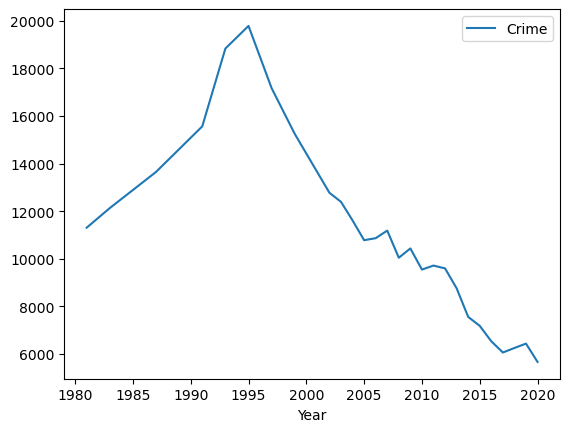

In [61]:
CrimeUKdf = pd.read_csv("CrimeUK.csv", header = 6)
CrimeUKdf.drop(columns=["CSEW estimate including fraud and computer misuse", "CSEW headline estimates excluding fraud and computer misuse - YE September ", "CSEW headline estimates including fraud and computer misuse - YE September"], axis=1, inplace=True)
CrimeUKdf.rename(columns={"CSEW estimates excluding fraud and computer misuse": "Crime", "Unnamed: 0": "Year"}, inplace=True)
CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract("(\d+)", expand=False)
#this removes the non numeric characters from the Year column, for example March 1981 becomes 1981
CrimeUKdf[["Crime", "Year"]] = CrimeUKdf[["Crime", "Year"]].apply(lambda col: pd.to_numeric(col, errors="coerce"))
CrimeUKdf.dropna(subset=["Crime"], inplace=True)
#drop null values
lines = CrimeUKdf.plot.line(x="Year", y="Crime")
CrimeUKdf


In [63]:
crimeginiuk = pd.merge(CrimeUKdf, GiniUKdf, on="Year")

fig, ax1 = plt.subplots(figsize=(10, 6))
#setting the size of the graph
ax1.set_xlabel("Year")
#label of the x axis
ax1.set_ylabel("Number of crimes")
#y axis label
ax1.plot(crimeginiuk["Year"], crimeginiuk["Crime"], color = "black", label = "Crime")

ax2 = ax1.twinx()

ax2.set_ylabel("Gini Index", color = "blue")
#adding second y axis
ax2.plot(crimeginiuk["Year"], crimeginiuk["Gini"], color = "blue", label="Gini Index (%)")
crimeginiuk

plt.savefig("UKCrimeGini.png")

NameError: name 'GiniUKdf' is not defined

In [65]:
site5 = "https://countryeconomy.com/hdi/uk"

response = bs(request.urlopen(site5),"html.parser")
TAB = response.find("table", class_="table tabledat table-striped table-condensed table-hover")

rows = TAB.find_all("tr")

with open("HDIUK.csv", "w") as file:
    file.write("Year, HDI, Rank")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

,Year,HDI
0,2022,0.940
1,2021,0.931
2,2020,0.920
3,2019,0.933
4,2018,0.928
5,2017,0.929
6,2016,0.926
7,2015,0.923
8,2014,0.924
9,2013,0.923


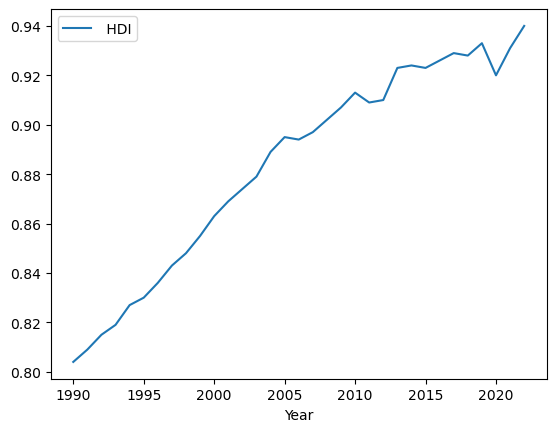

In [67]:
HDIUKdf = pd.read_csv("HDIUK.csv", encoding_errors="replace")
HDIUKdf.drop(columns=[" Rank"], axis=1, inplace=True)
HDIUKdf
lines = HDIUKdf.plot.line(x="Year", y=" HDI")
HDIUKdf

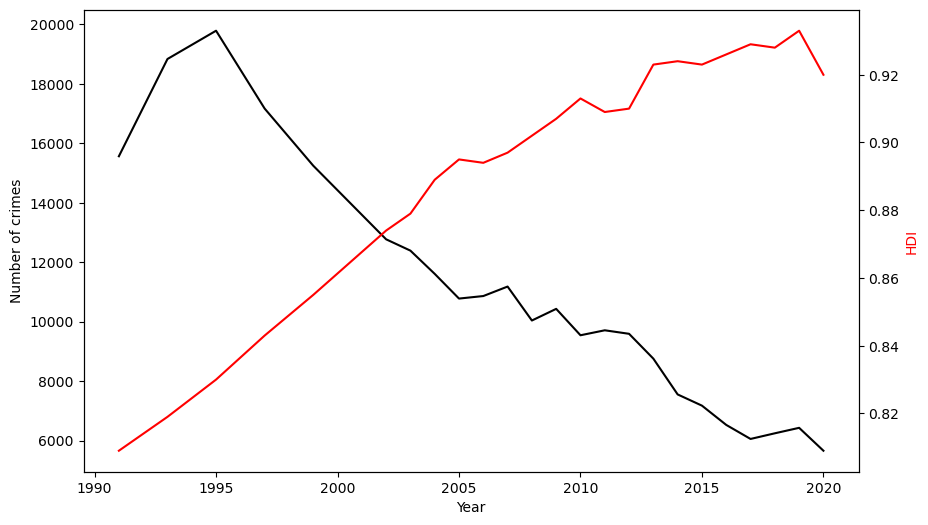

In [69]:
crimehdiuk = pd.merge(CrimeUKdf, HDIUKdf, on="Year")
crimehdiuk
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of crimes", color = "black")
ax1.plot(crimehdiuk["Year"], crimehdiuk["Crime"], color = "black", label = "Crime")

ax2 = ax1.twinx()

ax2.set_ylabel("HDI", color = "red")
ax2.plot(crimehdiuk["Year"], crimehdiuk[" HDI"], color = "red", label="HDI")
crimehdiuk

plt.savefig("UKCrimeHDI.png")

In [71]:
site7 = "https://tradingeconomics.com/country-list/gdp-per-capita?continent=world"

req = urllib.request.Request(
    site7,
    headers={"User-Agent": "Mozilla"}
)
#same code as before to bypass the webscraping block
response = bs(request.urlopen(req),"html.parser")
TAB = response.find("table", class_="table table-hover table-heatmap")

rows = TAB.find_all("tr")

with open("GDP.csv", "w") as file:
    file.write("Country,GDP Per Capita,GDPp,Date,Currency")
    for row in rows:
        cells = row.find_all("td")
        rowContents = []
        for cell in cells:
            rowContents.append(cell.text.strip())
        file.write(",".join(rowContents) + "\n")

NameError: name 'urllib' is not defined

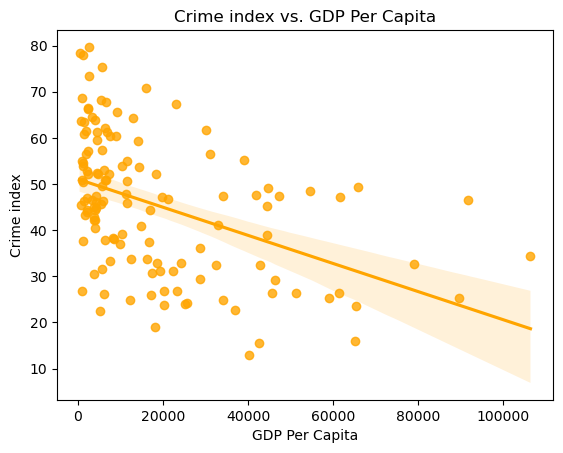

In [73]:
GDPdf = pd.read_csv("GDP.csv", encoding_errors="replace")
GDPdf.drop(columns=["GDPp", "Date", "Currency"], axis=1, inplace=True)
GDPdf
CrimevsGDP = pd.merge(Crimedf, GDPdf, on="Country",how="inner")
CrimevsGDP
sns.regplot(x=CrimevsGDP["GDP Per Capita"], y=CrimevsGDP["Crime index"], line_kws={"color": "orange"}, scatter_kws={"color": "orange"})

plt.xlabel("GDP Per Capita")
plt.ylabel("Crime index")
plt.title("Crime index vs. GDP Per Capita")
plt.savefig("CrimevsGDP.png")
plt.show()



In [75]:
CrimevsGDP = CrimevsGDP.dropna()

crimeList = list(CrimevsGDP["Crime index"])
GDPList = list(CrimevsGDP["GDP Per Capita"])

coeffcient, pvalue = scipy.stats.pearsonr(crimeList, GDPList)

if pvalue < 0.05:
    print("reject null hypothesis, correlation is significant")
else:
    print("do not reject, insufficient evidence")
print(coeffcient, pvalue)


reject null hypothesis, correlation is significant
-0.4383538614551583 1.3118162408764404e-07


In [77]:
regr = linear_model.LinearRegression()
x = CrimevsGDP[["GDP Per Capita"]]
y = CrimevsGDP["Crime index"]
regr.fit(x, y)

print(regr.coef_)

[-0.00030478]


In [79]:
urllib.request.urlretrieve("https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv", "GDPUK.zip")
shutil.unpack_archive("GDPUK.zip")


NameError: name 'urllib' is not defined

In [81]:
os.rename("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_19346.csv", "GDPUK.csv")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_19346.csv' -> 'GDPUK.csv'

,Country Name,Year,GDP Per Capita
81,United Kingdom,1960.0,1397.594803
347,United Kingdom,1961.0,1472.385714
613,United Kingdom,1962.0,1525.775853
879,United Kingdom,1963.0,1613.456884
1145,United Kingdom,1964.0,1748.288118
...,...,...,...
16307,United Kingdom,2021.0,46896.866243
16573,United Kingdom,2022.0,45935.927647
16839,United Kingdom,2023.0,49463.855462
17105,United Kingdom,2024.0,NaN


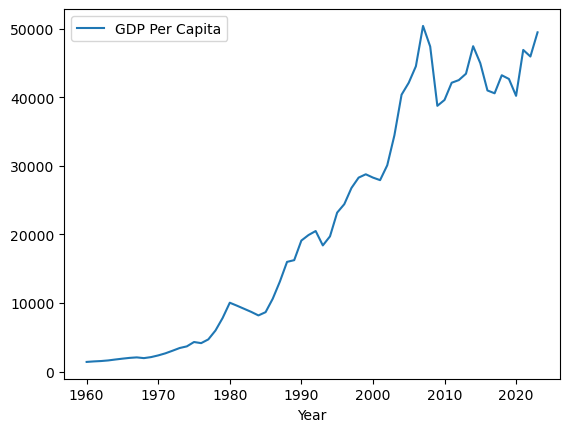

In [83]:
GDPUKdf = pd.read_csv("GDPUK.csv", header=2)
GDPUKdf = GDPUKdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GDPUKdf = pd.melt(GDPUKdf, id_vars=["Country Name"], var_name="Year", value_name="GDP Per Capita")
GDPUKdf = GDPUKdf[GDPUKdf["Country Name"] == "United Kingdom"]
GDPUKdf["Year"] = GDPUKdf["Year"].apply(lambda col: pd.to_numeric(col, errors="coerce"))
lines = GDPUKdf.plot.line(x="Year", y="GDP Per Capita")
GDPUKdf

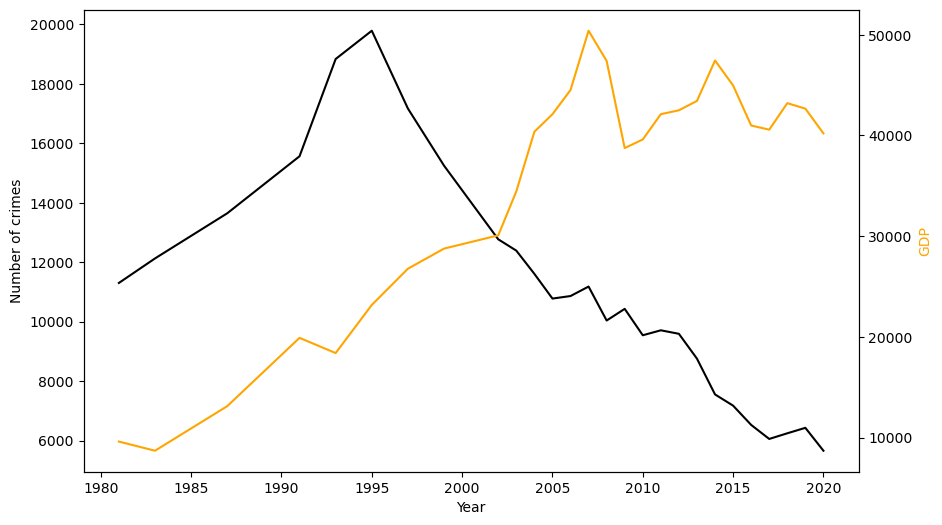

In [85]:
UKCrimeGDP = pd.merge(CrimeUKdf, GDPUKdf, on="Year")
UKCrimeGDP
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of crimes", color = "black")
ax1.plot(UKCrimeGDP["Year"], UKCrimeGDP["Crime"], color = "black", label = "Crime")

ax2 = ax1.twinx()

ax2.set_ylabel("GDP", color = "orange")
ax2.plot(UKCrimeGDP["Year"], UKCrimeGDP["GDP Per Capita"], color = "orange", label="GDP")
UKCrimeGDP

plt.savefig("UKCrimeGDP.png")

In [87]:
from statsmodels.compat import lzip
#lzip allows us to join lists together
#now estimating a linear regression model

dfMaster1 = pd.merge(Crimedf, HDIdf, on = "Country")
dfMaster2 = pd.merge(Ginidf, GDPdf, on = "Country")
dfMaster = pd.merge(dfMaster1, dfMaster2, on = "Country")
#creating a dataframe that combines all others
dfMaster = dfMaster.dropna()
#drop null colums
dfMasterValues = dfMaster.drop(columns = ["Country", "Crime index"])
print(dfMasterValues.corr())
#calculating and printing correlation between the variables
X = dfMaster[["Gini Coefficient (%)", "HDI", "GDP Per Capita"]]
#explanetory variables
y = dfMaster["Crime index"]

regr = linear_model.LinearRegression()
regr.fit(X, y)

variables = ["Gini", "HDI","GDP per capita"]
print(lzip(variables, regr.coef_))
#finds the regression coefficents, and combines them with the list of names
print("Intercept:",regr.intercept_)


                           HDI  Gini Coefficient (%)  GDP Per Capita
HDI                   1.000000             -0.462305        0.733261
Gini Coefficient (%) -0.462305              1.000000       -0.336145
GDP Per Capita        0.733261             -0.336145        1.000000
[('Gini', 0.7133350764578872), ('HDI', -39.897967626837406), ('GDP per capita', -2.658781148312528e-05)]
Intercept: 51.58157162695342


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#this module will be used to calculate variance inflation factor
from statsmodels.tools.tools import add_constant

dfMaster = dfMaster.drop(columns = ["Country"])
X = add_constant(dfMaster)

#adds a column of ones
# calculating variance inflation factors which will tell us how much variance of a coefficient is inflated due to correlations
vifData = pd.DataFrame()
#new dataframe for the VIF data
vifData["variable"] = X.columns
vifData["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
#looping through the columns and calculating variance inflation factor
X
print(vifData)

           variable         VIF
0             const  152.352690
1       Crime_index    1.843149
2               HDI    2.691721
3  Gini_Coefficient    1.553705
4    GDP_Per_Capita    2.166076


In [93]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

dfMaster = dfMaster.rename(columns={"Crime index": "Crime_index","Gini Coefficient (%)": "Gini_Coefficient","GDP Per Capita": "GDP_Per_Capita"})
#the columns need to be renamed as the function does not work with spaces
fit = smf.ols("Crime_index ~ Gini_Coefficient+HDI+GDP_Per_Capita", data=dfMaster).fit()
 
names = ["Lagrange multiplier statistic", "p-value","f-value", "f p-value"]
 
testResult = sms.het_breuschpagan(fit.resid, fit.model.exog)
#this function performs the breusch pagan test
lzip(names, testResult)